In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
import numpy as np
import shutil, os, pathlib
print(tf.__version__)

In [ ]:
original_dir = pathlib.Path("data/dogs-vs-cats/train")
new_base_dir = pathlib.Path("data/dogs-vs-cats/small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir/subset_name/category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir/fname, dst=dir/fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [8]:
class ConvNetModel(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.layers_list = []
        self.layers_list.append(tf.keras.layers.RandomFlip("horizontal"))
        self.layers_list.append(tf.keras.layers.RandomRotation(0.1))
        self.layers_list.append(tf.keras.layers.RandomZoom(0.2))
        self.layers_list.append(tf.keras.layers.Rescaling(1.0 / 255))
        self.layers_list.append(
            tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu")
        )
        self.layers_list.append(tf.keras.layers.MaxPooling2D(pool_size=2))
        self.layers_list.append(
            tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu")
        )
        self.layers_list.append(tf.keras.layers.MaxPooling2D(pool_size=2))
        self.layers_list.append(
            tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu")
        )
        self.layers_list.append(tf.keras.layers.MaxPooling2D(pool_size=2))
        self.layers_list.append(
            tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu")
        )
        self.layers_list.append(tf.keras.layers.MaxPooling2D(pool_size=2))
        self.layers_list.append(
            tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu")
        )
        self.layers_list.append(tf.keras.layers.Flatten())
        self.layers_list.append(tf.keras.layers.Dropout(0.5))
        self.layers_list.append(tf.keras.layers.Dense(1, activation="sigmoid"))

    def call(self, inputs):
        z = inputs
        for layer in self.layers_list:
            z = layer(z)
        return z


model = ConvNetModel()
model.compile(
    optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"]
)

print(model.summary())

Model: "conv_net_model_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_3 (RandomFlip)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_3               │ ?                      │   0 (unbuilt) │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_3 (RandomZoom)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_3 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [9]:
new_base_dir = pathlib.Path("data/dogs-vs-cats/small")
train_dataset = image_dataset_from_directory(
    new_base_dir / "train", image_size=(180, 180), batch_size=32
)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation", image_size=(180, 180), batch_size=32
)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test", image_size=(180, 180), batch_size=32
)

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="data/model_checkpoints/convnet-dogscats.keras",
        save_best_only=True,
        monitor="val_loss",
    )
]
history = model.fit(
    train_dataset, epochs=50, validation_data=validation_dataset, callbacks=callbacks
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 35s 537ms/step - accuracy: 0.5032 - loss: 0.7045 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 512ms/step - accuracy: 0.4784 - loss: 0.6946 - val_accuracy: 0.5600 - val_loss: 0.6919
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 505ms/step - accuracy: 0.5269 - loss: 0.6935 - val_accuracy: 0.5550 - val_loss: 0.6861
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 508ms/step - accuracy: 0.5599 - loss: 0.6850 - val_accuracy: 0.6380 - val_loss: 0.6479
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 503ms/step - accuracy: 0.6242 - loss: 0.6501 - val_accuracy: 0.5650 - val_loss: 0.6945
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 501ms/step - accuracy: 0.6446 - loss: 0.6286 - val_accuracy: 0.5780 - val_loss: 0.6505
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 503ms/step - accuracy: 0.6467 - loss: 0.6160 - val_accuracy: 

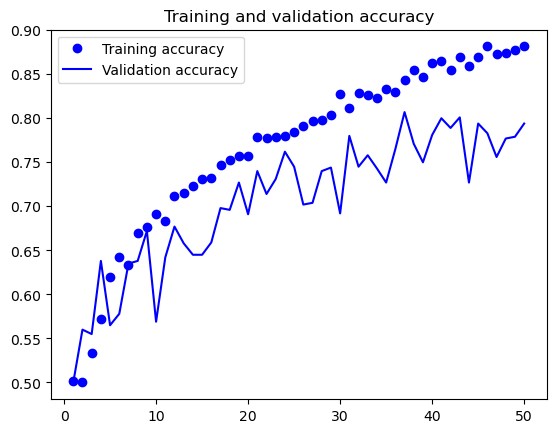

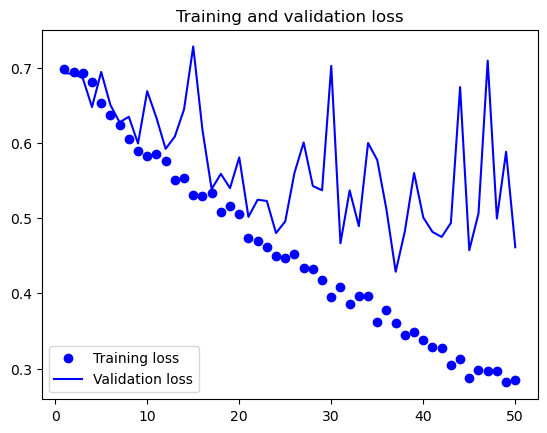

In [10]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [11]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 176ms/step - accuracy: 0.7639 - loss: 0.4918
Test accuracy: 0.769
